In [1]:
%matplotlib inline

Automatically created module for IPython interactive environment


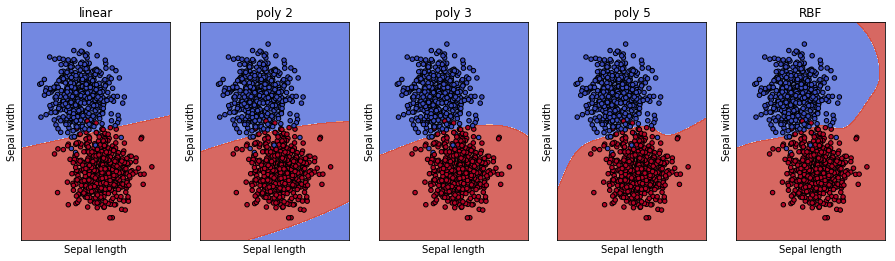

In [4]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import pandas as pd


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


np.random.seed(1)
df = pd.read_csv('/Users/dashabalashova/python projects/1_1_5_ML_Bioinf/HW5/blobs2.csv')
df.columns = ['x','y','label']

X = df[['x','y']].values

y = df[['label']]
y = y.label.values

C = 1.0  # SVM regularization parameter

models = (svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='poly', degree=2, gamma='auto', C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C),
          svm.SVC(kernel='poly', degree=5, gamma='auto', C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C))

models = (clf.fit(X, y) for clf in models)

titles = ('linear',
          'poly 2',
          'poly 3',
          'poly 5',
         'RBF')

fig, sub = plt.subplots(1, 5)
plt.subplots_adjust(left  = 0.0, right  = 2.0, wspace=0.2, hspace=0.8)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('/Users/dashabalashova/python projects/1_1_5_ML_Bioinf/data/cancer.csv')
df['label'] = df['label'].map({'M':1, 'B':0})
train_df, validate_df = train_test_split(df, test_size=0.2, stratify=df.label)

X_train = train_df.drop(columns=['label']).values
y_train = train_df.label.values
X_val = validate_df.drop(columns=['label']).values
y_val = validate_df.label.values

In [18]:
from sklearn.ensemble import RandomForestClassifier
from time import time
from sklearn import svm


kernel_svm = svm.SVC(kernel='linear', C=9.5, random_state=0)
rforest = RandomForestClassifier(n_estimators=2000, max_depth=7, random_state=0)

kernel_svm_time = time()
kernel_svm.fit(X_train, y_train)
kernel_svm_score = kernel_svm.score(X_val, y_val)
kernel_svm_time = time() - kernel_svm_time
print('svm time:', kernel_svm_time, ', svm score:', kernel_svm_score)

rforest_time = time()
rforest.fit(X_train, y_train)
rforest_score = rforest.score(X_val, y_val)
rforest_time = time() - rforest_time
print('forest time:', rforest_time,', forest score:', rforest_score)

svm time: 3.7867021560668945 , svm score: 0.9824561403508771
forest time: 2.850480079650879 , forest score: 0.956140350877193


In [18]:
df = pd.read_csv('/Users/dashabalashova/python projects/1_1_5_ML_Bioinf/data/spam.csv')
train_df, validate_df = train_test_split(df, test_size=0.2, stratify=df.label)

X_train = train_df.drop(columns=['label']).values
y_train = train_df.label.values
X_val = validate_df.drop(columns=['label']).values
y_val = validate_df.label.values

In [19]:
kernel_svm_time = time()
kernel_svm.fit(X_train, y_train)
kernel_svm_score = kernel_svm.score(X_val, y_val)
kernel_svm_time = time() - kernel_svm_time
print('svm time:', kernel_svm_time, ', svm score:', kernel_svm_score)

rforest_time = time()
rforest.fit(X_train, y_train)
rforest_score = rforest.score(X_val, y_val)
rforest_time = time() - rforest_time
print('forest time:', rforest_time,', forest score:', rforest_score)

svm time: 740.6755063533783 , svm score: 0.9283387622149837
forest time: 0.0225369930267334 , forest score: 0.8751357220412594


In [28]:
rforest = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=0)

rforest_time = time()
rforest.fit(X_train, y_train)
rforest_score = rforest.score(X_val, y_val)
rforest_time = time() - rforest_time
print('forest time:', rforest_time,', forest score:', rforest_score)

forest time: 3.151282787322998 , forest score: 0.9305103148751357
